In [ ]:
import pandas as pd
import numpy as np

**Importing Training Dataset**

In [ ]:
xtrain = pd.read_csv('Train.csv')

**EDA on Training Dataset**

In [ ]:
xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
print("Number of Rows = ", xtrain.shape[0])
print("Number of Features = ", xtrain.shape[1])

Number of Rows =  8523
Number of Features =  12


In [ ]:
xtrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Chacking for NULL values

In [ ]:
xtrain.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


**Handling Missing Values**

In [ ]:
#Filling Missing Values in Item_Weight with mean
xtrain['Item_Weight'] = xtrain['Item_Weight'].fillna(xtrain['Item_Weight'].mean())

In [ ]:
xtrain.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
xtrain['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
xtrain.groupby('Outlet_Type')['Outlet_Size'].agg(pd.Series.mode)

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [ ]:
xtrain.loc[xtrain['Outlet_Type']=='Grocery Store','Outlet_Size']='Small'
xtrain.loc[xtrain['Outlet_Type']=='Supermarket Type1','Outlet_Size']='Small'
xtrain.loc[xtrain['Outlet_Type']=='Supermarket Type2','Outlet_Size']='Medium'
xtrain.loc[xtrain['Outlet_Type']=='Supermarket Type3','Outlet_Size']='Medium'

In [ ]:
xtrain.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


**Data Visualization**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1000x500 with 0 Axes>

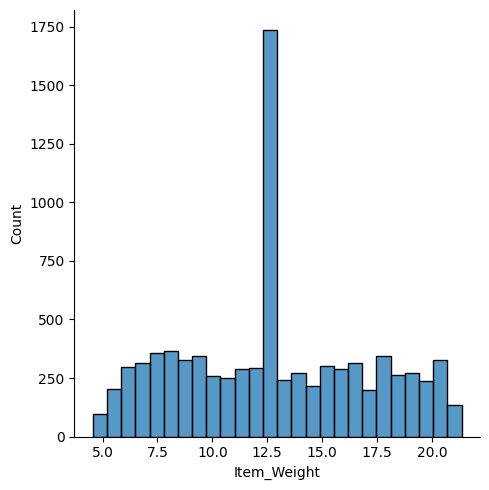

<Figure size 1000x500 with 0 Axes>

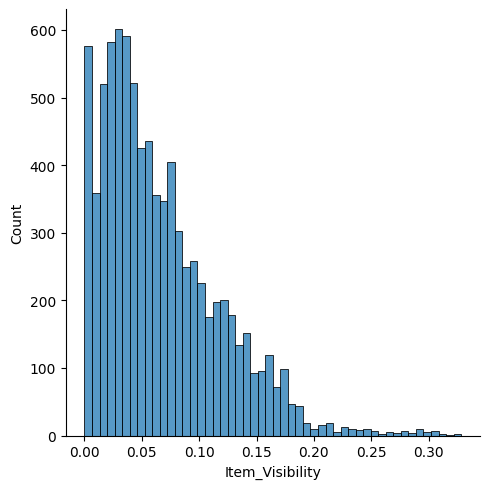

<Figure size 1000x500 with 0 Axes>

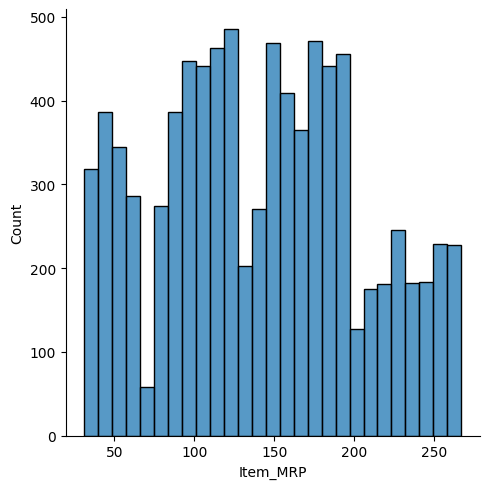

<Figure size 1000x500 with 0 Axes>

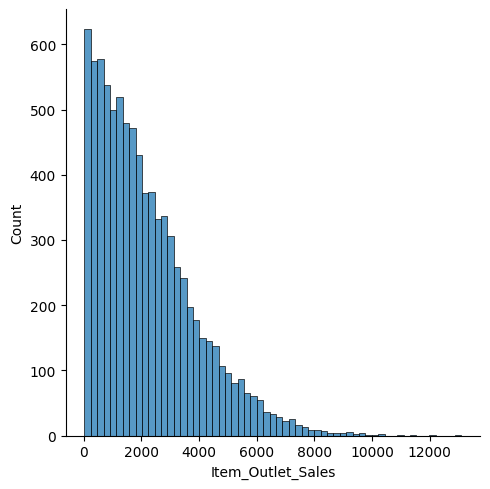

In [ ]:
numcolumns = ['Item_Weight',	'Item_Visibility',	'Item_MRP', 'Item_Outlet_Sales']
for col in numcolumns:
    plt.figure(figsize=(10,5))
    sns.displot(xtrain[col])
    plt.show()

Categorical Variable Viz

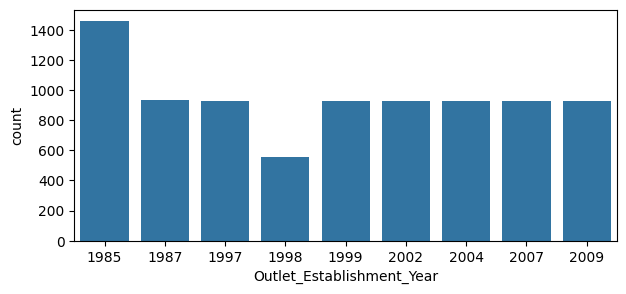

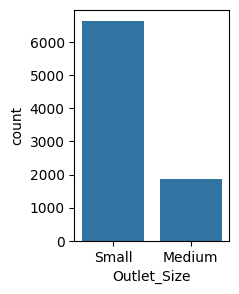

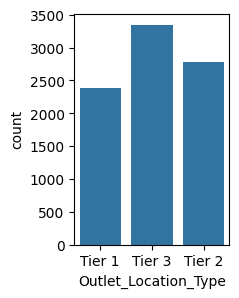

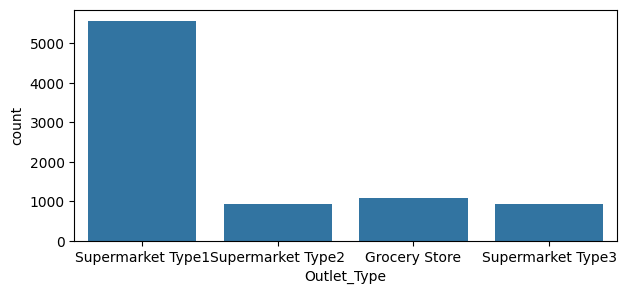

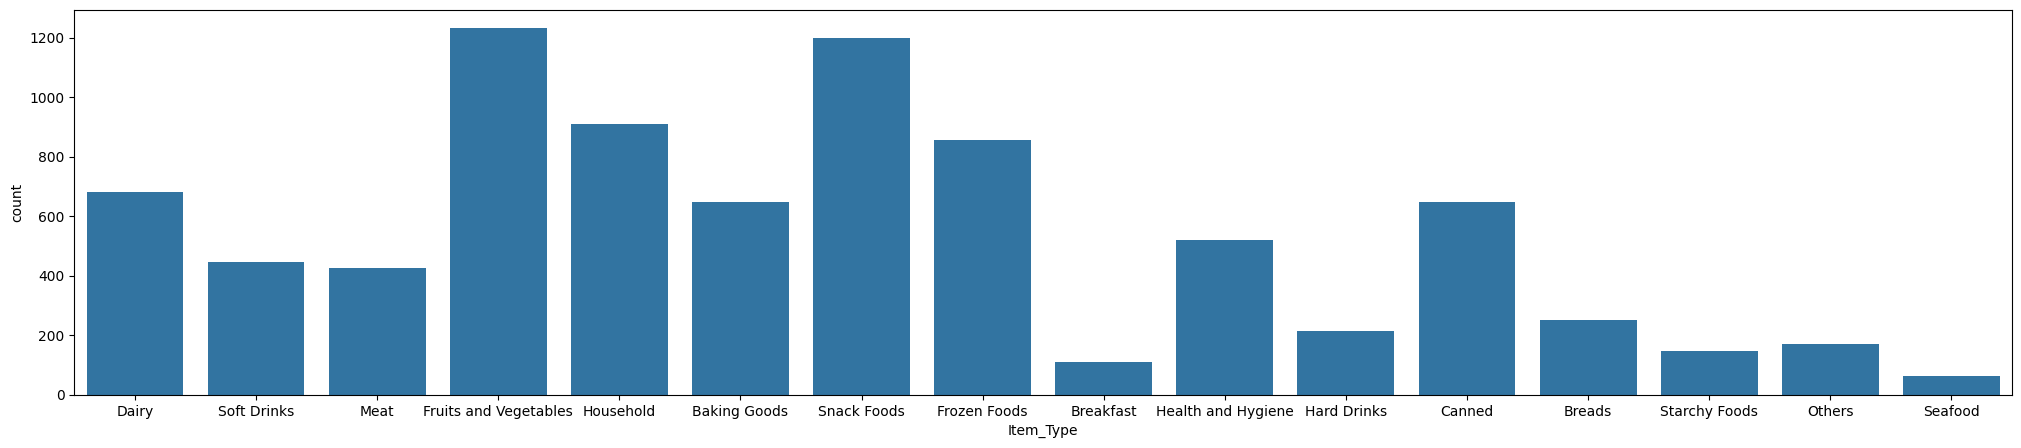

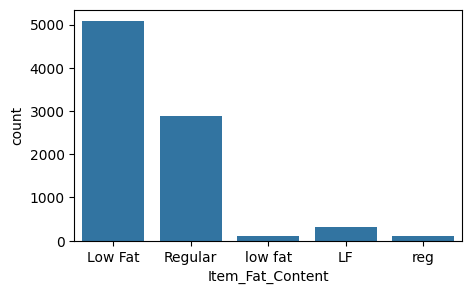

In [ ]:
#Outlet Viz
plt.figure(figsize=(7,3))
sns.countplot(x='Outlet_Establishment_Year', data=xtrain)
plt.show()

plt.figure(figsize=(2,3))
sns.countplot(x='Outlet_Size', data=xtrain)
plt.show()

plt.figure(figsize=(2,3))
sns.countplot(x='Outlet_Location_Type', data=xtrain)
plt.show()

plt.figure(figsize=(7,3))
sns.countplot(x='Outlet_Type', data=xtrain)
plt.show()


#Product Property Viz
plt.figure(figsize=(25,5))
sns.countplot(x='Item_Type', data=xtrain)
plt.show()

plt.figure(figsize=(5,3))
sns.countplot(x='Item_Fat_Content', data=xtrain)
plt.show()

**Data Preprocessing**

In [ ]:
xtrain['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
xtrain.loc[xtrain['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
xtrain.loc[xtrain['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
xtrain.loc[xtrain['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

#After Correction
xtrain['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


Label Encoding of Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
Encod= LabelEncoder()
xtrain['Outlet_Size']=Encod.fit_transform(xtrain['Outlet_Size'])
xtrain['Outlet_Type']=Encod.fit_transform(xtrain['Outlet_Type'])
xtrain['Outlet_Location_Type']=Encod.fit_transform(xtrain['Outlet_Location_Type'])

xtrain['Item_Type']=Encod.fit_transform(xtrain['Item_Type'])
xtrain['Item_Fat_Content']=Encod.fit_transform(xtrain['Item_Fat_Content'])

xtrain['Item_Identifier']=Encod.fit_transform(xtrain['Item_Identifier'])
xtrain['Outlet_Identifier']=Encod.fit_transform(xtrain['Outlet_Identifier'])

In [ ]:
xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052


**Data Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Encod= StandardScaler()

xtrain['Item_MRP']=Encod.fit_transform(xtrain['Item_MRP'].values.reshape(-1,1))
xtrain['Item_Weight']=Encod.fit_transform(xtrain['Item_Weight'].values.reshape(-1,1))
xtrain['Item_Visibility']=Encod.fit_transform(xtrain['Item_Visibility'].values.reshape(-1,1))
xtrain['Item_Outlet_Sales']=Encod.fit_transform(xtrain['Item_Outlet_Sales'].values.reshape(-1,1))

xtrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1,0.910601
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,0,2,2,-1.018440
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1,-0.049238
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0,-0.849103
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,1,2,1,-0.695373


Seperating features and labels

In [ ]:
Features = xtrain.drop(columns=['Item_Outlet_Sales'], axis=1)
Target = xtrain['Item_Outlet_Sales']

In [ ]:
Features

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,-0.841872,0,-0.970732,4,1.747454,9,1999,1,0,1
1,8,-1.641706,1,-0.908111,14,-1.489023,3,2009,0,2,2
2,662,1.098554,0,-0.956917,10,0.010040,9,1999,1,0,1
3,1121,1.500838,1,-1.281758,6,0.660050,0,1998,1,2,0
4,1297,-0.929428,0,-1.281758,9,-1.399220,1,1987,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,-1.418084,0,-0.181193,13,1.180783,1,1987,1,2,1
8519,897,-1.059578,1,-0.371154,0,-0.527301,7,2002,1,1,1
8520,1357,-0.534243,0,-0.599784,8,-0.897208,6,2004,1,1,1
8521,681,-1.336444,1,1.532880,13,-0.607977,3,2009,0,2,2


In [ ]:
Target.head()

,Item_Outlet_Sales
0,0.910601
1,-1.018440
2,-0.049238
3,-0.849103
4,-0.695373


Split Train Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Features_train,Features_test,Target_train,Target_test = train_test_split(Features,Target,test_size=0.2,random_state=42)

Importing the Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
import sklearn.metrics as metrics

Random Forrest Regression

In [ ]:
model= RandomForestRegressor()

#Fitting Model on Training data
model.fit(Features_train,Target_train)

#Test Dataset Prediction
prediction = model.predict(Features_test)

#Error Calculation
absoluteError = metrics.mean_absolute_error(Target_test,prediction)
print("Mean Absolute Error: ", absoluteError)

squaredError = metrics.mean_squared_error(Target_test,prediction)
print("Mean Squared Error: ", squaredError)

Mean Absolute Error:  0.4483054460294603
Mean Squared Error:  0.41463272669421214


SVM

In [ ]:
model=SVR()

#Fitting Model on Training data
model.fit(Features_train,Target_train)

#Test Dataset Prediction
prediction = model.predict(Features_test)

#Error Calculation
absoluteError = metrics.mean_absolute_error(Target_test,prediction)
print("Mean Absolute Error: ", absoluteError)

squaredError = metrics.mean_squared_error(Target_test,prediction)
print("Mean Squared Error: ", squaredError)

Mean Absolute Error:  0.7432809334031226
Mean Squared Error:  0.9562528325456281


Save Model

In [ ]:
from joblib import dump
dump(model, 'SVR.joblib')

['SVR.joblib']

Making a Predictive System

In [ ]:
xtest = pd.read_csv('Test.csv')

In [ ]:
xtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
xtest.shape[1]

11

In [ ]:
xtrain.shape[1]

12

Pre Processing Test Data

In [ ]:
xtest.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [ ]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
xtest['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3396
Regular,1935
LF,206
reg,78
low fat,66


In [ ]:
xtest.loc[xtest['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
xtest.loc[xtest['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
xtest.loc[xtest['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

#After Correction
xtest['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,3668
Regular,2013


Label Encoding

In [ ]:
Encod= LabelEncoder()
xtest['Outlet_Size']=Encod.fit_transform(xtest['Outlet_Size'])
xtest['Outlet_Type']=Encod.fit_transform(xtest['Outlet_Type'])
xtest['Outlet_Location_Type']=Encod.fit_transform(xtest['Outlet_Location_Type'])

xtest['Item_Type']=Encod.fit_transform(xtest['Item_Type'])
xtest['Item_Fat_Content']=Encod.fit_transform(xtest['Item_Fat_Content'])

xtest['Item_Identifier']=Encod.fit_transform(xtest['Item_Identifier'])
xtest['Outlet_Identifier']=Encod.fit_transform(xtest['Outlet_Identifier'])

In [ ]:
xtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300,1,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600,0,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315,0,0.015388,13,155.0340,2,2007,3,1,1
4,1184,NaN,1,0.118599,4,234.2300,5,1985,1,2,3


In [ ]:
xtest.isnull().sum()

,0
Item_Identifier,0
Item_Weight,976
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
Encod= StandardScaler()

xtest['Item_MRP']=Encod.fit_transform(xtest['Item_MRP'].values.reshape(-1,1))
xtest['Item_Weight']=Encod.fit_transform(xtest['Item_Weight'].values.reshape(-1,1))
xtest['Item_Visibility']=Encod.fit_transform(xtest['Item_Visibility'].values.reshape(-1,1))

xtest.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,1.726792,0,-1.134077,13,-0.536555,9,1999,1,0,1
1,1067,-0.942389,1,-0.531850,4,-0.868937,2,2007,3,1,1
2,1406,0.408281,0,0.661316,11,1.629848,0,1998,3,2,0
3,809,-1.153565,0,-0.981416,13,0.226697,2,2007,3,1,1
4,1184,NaN,1,1.032540,4,1.508110,5,1985,1,2,3


Load trained model

In [ ]:
from joblib import load

model = load('SVR.joblib')
